In [1]:
# Install required packages.
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-geometric

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

D:\Appli\Anaconda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://data.pyg.org/whl/torch-1.12.1.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-scatter
Failed to build torch-scatter
  Running setup.py install for torch-scatter: started
  Running setup.py install for torch-scatter: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [41 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\torch_scatter
  copying torch_scatter\placeholder.py -> build\lib.win-amd64-cpython-310\torch_scatter
  copying torch_scatter\scatter.py -> build\lib.win-amd64-cpython-310\torch_scatter
  copying torch_scatter\segment_coo.py -> build\lib.win-amd64-cpython-310\torch_scatter
  copying torch_scatter\segment_csr.py -> build\lib.win-amd64-cpython-310\torch_scatter
  copying torch_scatter\testing.py -> build\lib.win-amd64-cpython-310\torch_scatter
  copying torch_scatter\utils.py -> build\lib.win-amd64-cpython-310\torch_scatter
  copying torch_scatter\__init__.py -> build\lib.win-amd64-cpython-310\torch_scatter
  creating build\lib.win-amd64-cpython-310\torch_scatter\composite
  copying torch_scatte

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://data.pyg.org/whl/torch-1.12.1.html
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-sparse
Failed to build torch-sparse
  Running setup.py install for torch-sparse: started
  Running setup.py install for torch-sparse: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [138 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\torch_sparse
  copying torch_sparse\add.py -> build\lib.win-amd64-cpython-310\torch_sparse
  copying torch_sparse\bandwidth.py -> build\lib.win-amd64-cpython-310\torch_sparse
  copying torch_sparse\cat.py -> build\lib.win-amd64-cpython-310\torch_sparse
  copying torch_sparse\coalesce.py -> build\lib.win-amd64-cpython-310\torch_sparse
  copying torch_sparse\convert.py -> build\lib.win-amd64-cpython-310\torch_sparse
  copying torch_sparse\diag.py -> build\lib.win-amd64-cpython-310\torch_sparse
  copying torch_sparse\eye.py -> build\lib.win-amd64-cpython-310\torch_sparse
  copying torch_sparse\index_select.py -> build\lib.win-amd64-cpython-310\torch_sparse
  copying torch_sparse\masked_select.py

Defaulting to user installation because normal site-packages is not writeable


# Node Classification with Graph Neural Networks

[Previous: Introduction: Hands-on Graph Neural Networks](https://colab.research.google.com/drive/1D5Yl32FP3PX3LWJPj6KNutrJHpVZVLMo#scrollTo=NgcpV4rjAWy-)

This tutorial will teach you how to apply **Graph Neural Networks (GNNs) to the task of node classification**.
Here, we are given the ground-truth labels of only a small subset of nodes, and want to infer the labels for all the remaining nodes (*transductive learning*).

To demonstrate, we make use of the `Cora` dataset, which is a **citation network** where nodes represent documents.
Each node is described by a 1433-dimensional bag-of-words feature vector.
Two documents are connected if there exists a citation link between them.
The task is to infer the category of each document (7 in total).

This dataset was first introduced by [Yang et al. (2016)](https://arxiv.org/abs/1603.08861) as one of the datasets of the `Planetoid` benchmark suite.
We again can make use [PyTorch Geometric](https://github.com/rusty1s/pytorch_geometric) for an easy access to this dataset via [`torch_geometric.datasets.Planetoid`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.Planetoid):

In [118]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# 1 - Get the first graph object.
data = dataset[0]
print()
print(data)
print('===========================================================================================================')

# 2 - Gather some statistics about the graph. (Add your code between the brackets)

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


Overall, this dataset is quite similar to the previously used [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) network.
We can see that the `Cora` network holds 2,708 nodes and 10,556 edges, resulting in an average node degree of 3.9.
For training this dataset, we are given the ground-truth categories of 140 nodes (20 for each class).
This results in a training node label rate of only 5%.

In contrast to `KarateClub`, this graph holds the additional attributes `val_mask` and `test_mask`, which denotes which nodes should be used for validation and testing.
Furthermore, we make use of **[data transformations](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#data-transforms) via `transform=NormalizeFeatures()`**.
Transforms can be used to modify your input data before inputting them into a neural network, *e.g.*, for normalization or data augmentation.
Here, we [row-normalize](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.NormalizeFeatures) the bag-of-words input feature vectors.

We can further see that this network is undirected, and that there exists no isolated nodes (each document has at least one citation).

## Training a Multi-layer Perception Network (MLP)

In theory, we should be able to infer the category of a document solely based on its content, *i.e.* its bag-of-words feature representation, without taking any relational information into account.

Let's verify that by constructing a simple MLP that solely operates on input node features (using shared weights across all nodes):

In [121]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(MLP, self).__init__()
        torch.manual_seed(12345)

        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        x = torch.nn.Softmax(dim=-1)(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Our MLP is defined by two linear layers and enhanced by [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) non-linearity and [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout).
Here, we first reduce the 1433-dimensional feature vector to a low-dimensional embedding (`hidden_channels=16`), while the second linear layer acts as a classifier that should map each low-dimensional node embedding to one of the 7 classes.

Let's train our simple MLP by following a similar procedure as described in [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8).
We again make use of the **cross entropy loss** and **Adam optimizer**.
This time, we also define a **`test` function** to evaluate how well our final model performs on the test node set (which labels have not been observed during training).

In [122]:
import numpy as np
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion with crossEntropyLoss.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.
# Add your code where needed
def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.        
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x)
    out = out[data.test_mask]
    GT = data.y[data.test_mask]
    print(out)
    print(out.shape)
    # 6- Set the predicted value to the class with highest probability.
    class_pred=torch.argmax(out, dim=1)
    class_pred = class_pred.T
    # 7- Check against ground-truth labels.
    # 8- Derive ratio of correct predictions.
    pred_correct = sum(class_pred == GT)
    test_acc = pred_correct / len(GT)
    
    return test_acc


model = MLP(hidden_channels=16)
for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9461
Epoch: 002, Loss: 1.9457
Epoch: 003, Loss: 1.9451
Epoch: 004, Loss: 1.9444
Epoch: 005, Loss: 1.9437
Epoch: 006, Loss: 1.9435
Epoch: 007, Loss: 1.9422
Epoch: 008, Loss: 1.9416
Epoch: 009, Loss: 1.9413
Epoch: 010, Loss: 1.9405
Epoch: 011, Loss: 1.9396
Epoch: 012, Loss: 1.9397
Epoch: 013, Loss: 1.9381
Epoch: 014, Loss: 1.9383
Epoch: 015, Loss: 1.9351
Epoch: 016, Loss: 1.9360
Epoch: 017, Loss: 1.9335
Epoch: 018, Loss: 1.9355
Epoch: 019, Loss: 1.9329
Epoch: 020, Loss: 1.9307
Epoch: 021, Loss: 1.9293
Epoch: 022, Loss: 1.9320
Epoch: 023, Loss: 1.9276
Epoch: 024, Loss: 1.9260
Epoch: 025, Loss: 1.9264
Epoch: 026, Loss: 1.9227
Epoch: 027, Loss: 1.9221
Epoch: 028, Loss: 1.9172
Epoch: 029, Loss: 1.9135
Epoch: 030, Loss: 1.9127
Epoch: 031, Loss: 1.9131
Epoch: 032, Loss: 1.9118
Epoch: 033, Loss: 1.9044
Epoch: 034, Loss: 1.9046
Epoch: 035, Loss: 1.9005
Epoch: 036, Loss: 1.8917
Epoch: 037, Loss: 1.8931
Epoch: 038, Loss: 1.8903
Epoch: 039, Loss: 1.8898
Epoch: 040, Loss: 1.8795


After training the model, we can call the `test` function to see how well our model performs on unseen labels.
Here, we are interested in the accuracy of the model, *i.e.*, the ratio of correctly classified nodes:

In [123]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

tensor([[0.3096, 0.1690, 0.0737,  ..., 0.0593, 0.2478, 0.1088],
        [0.2371, 0.0600, 0.1915,  ..., 0.2081, 0.1124, 0.1540],
        [0.2750, 0.1420, 0.1036,  ..., 0.1096, 0.1596, 0.1733],
        ...,
        [0.1556, 0.2268, 0.0382,  ..., 0.0775, 0.3831, 0.0893],
        [0.0427, 0.0552, 0.2173,  ..., 0.5532, 0.0455, 0.0593],
        [0.2114, 0.1820, 0.1227,  ..., 0.3072, 0.0627, 0.0769]],
       grad_fn=<IndexBackward0>)
torch.Size([1000, 7])
Test Accuracy: 0.4470


**Question**: Comment the results, why do you think the model behaves poorly? 

**Remark:** The model fails to incorporate an important bias into the model: **Cited papers are very likely related to the category of a document**.
That is exactly where Graph Neural Networks come into play and can help to boost the performance of our model.



## Training a Graph Neural Network (GNN)

We can easily convert our MLP to a GNN by swapping the `torch.nn.Linear` layers with PyG's GNN operators.

Following-up on [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8), we replace the linear layers by the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) module.
To recap, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)) is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.
In contrast, a single linear layer is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \mathbf{x}_v^{(\ell)}
$$

which does not make use of neighboring node information.

In [130]:
from torch_geometric.nn import GCNConv
# Create a GCN with the number of hidden channels = 16 
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        # 9 - define Two Graph Convolutional layers self.conv1 and self.conv2, carefully define input and output size
        self.conv1 = GCNConv(dataset.num_features, out_channels = 16)
        self.conv2 = GCNConv(in_channels= 16, out_channels= 7)

    def forward(self, x, edge_index):
         # 10 - compute x <- Output of the first convolutional layer .
        x = self.conv1(x, edge_index)
         # 11 - compute x <- ReLU (x)
        x = x.relu()
         # 12 - compute x <- Dropout with p=0.5 
        x = F.dropout(x, p=0.5, training=self.training)
         # 13 - compute x <- Output of the second convolutional layer
        x = self.conv2(x, edge_index)
        return x

    
model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


Let's visualize the node embeddings of our **untrained** GCN network.
For visualization, we make use of [**TSNE**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to embed our 7-dimensional node embeddings onto a 2D plane.

D:\Appli\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Appli\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


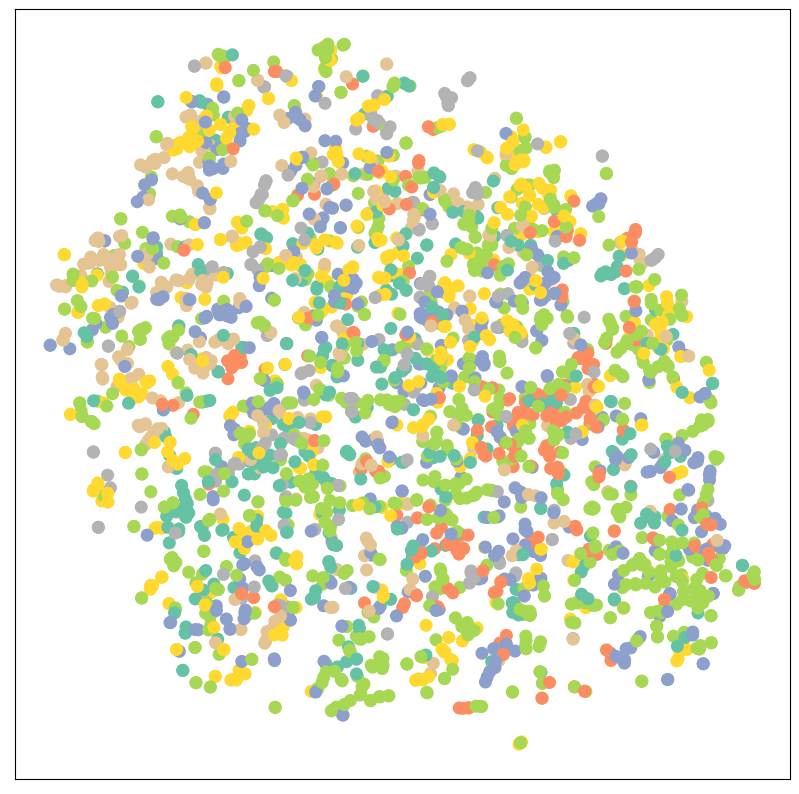

In [143]:
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)


**Question**: What do you observe ? Comment the results of T-SNE. 

The training and testing procedure is once again the same, but this time we make use of the node features `x` **and** the graph connectivity `edge_index` as input to our GCN model.

OBSERVATIONS : on constate bien que les 7 classes sont mélangées entre elles, il n'y a pas de clusters apparents.

In [145]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss


def test():
    model.eval()
    out = model(data.x, data.edge_index)
    out = out[data.test_mask]
    GT = data.y[data.test_mask]
    print(out)
    print(out.shape)
    # Use the class with highest probability.
    class_pred=torch.argmax(out, dim=1)
    class_pred = class_pred.T
    # 7- Check against ground-truth labels.
    # 8- Derive ratio of correct predictions.
    pred_correct = sum(class_pred == GT)
    test_acc = pred_correct / len(GT)
    return test_acc

    

for epoch in range(1, 101):
   loss = train()
   print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9465
Epoch: 002, Loss: 1.9419
Epoch: 003, Loss: 1.9363
Epoch: 004, Loss: 1.9290
Epoch: 005, Loss: 1.9199
Epoch: 006, Loss: 1.9140
Epoch: 007, Loss: 1.9079
Epoch: 008, Loss: 1.8992
Epoch: 009, Loss: 1.8876
Epoch: 010, Loss: 1.8764
Epoch: 011, Loss: 1.8656
Epoch: 012, Loss: 1.8626
Epoch: 013, Loss: 1.8460
Epoch: 014, Loss: 1.8329
Epoch: 015, Loss: 1.8225
Epoch: 016, Loss: 1.8167
Epoch: 017, Loss: 1.7995
Epoch: 018, Loss: 1.7878
Epoch: 019, Loss: 1.7716
Epoch: 020, Loss: 1.7568
Epoch: 021, Loss: 1.7563
Epoch: 022, Loss: 1.7342
Epoch: 023, Loss: 1.7092
Epoch: 024, Loss: 1.7015
Epoch: 025, Loss: 1.6671
Epoch: 026, Loss: 1.6757
Epoch: 027, Loss: 1.6609
Epoch: 028, Loss: 1.6355
Epoch: 029, Loss: 1.6339
Epoch: 030, Loss: 1.6102
Epoch: 031, Loss: 1.5964
Epoch: 032, Loss: 1.5721
Epoch: 033, Loss: 1.5570
Epoch: 034, Loss: 1.5445
Epoch: 035, Loss: 1.5093
Epoch: 036, Loss: 1.4889
Epoch: 037, Loss: 1.4776
Epoch: 038, Loss: 1.4704
Epoch: 039, Loss: 1.4263
Epoch: 040, Loss: 1.3972


After training the model, we can check its test accuracy:

In [146]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')
# .4f : is to restrict the numbers after the comma (float number with 4 values after the comma)

tensor([[ 0.3835,  0.3311, -0.1134,  ..., -0.0236,  0.1022, -0.3774],
        [-0.8229, -0.7556,  1.9754,  ..., -0.1109, -0.6121,  0.6181],
        [-0.2720, -0.1899,  0.9515,  ...,  0.1241, -0.3255, -0.4397],
        ...,
        [ 1.2948,  0.7541, -1.6419,  ..., -0.7677,  1.0990, -0.7214],
        [ 0.4026,  0.0038, -0.2838,  ...,  0.9782, -0.3893, -1.1835],
        [ 0.2653, -0.0173, -0.1537,  ...,  0.8077, -0.2879, -1.1317]],
       grad_fn=<IndexBackward0>)
torch.Size([1000, 7])
Test Accuracy: 0.8110


**There it is!**
By simply swapping the linear layers with GCN layers, we can reach **81.5% of test accuracy**!

**Question**: How do you explain this result ? Why does a GCN do better than a linear layer ? 



**Réponse**:Un GCN permet de prendre en compte la structure inhérente aux données. Il permet aussi de prendre en compte les dépendances locales et globales. Cela permet d'obtenir de meilleures performances étant donné qu'il y a un biais dans nos données (les papiers cités sont liés à la catégorie de document).

D:\Appli\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Appli\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


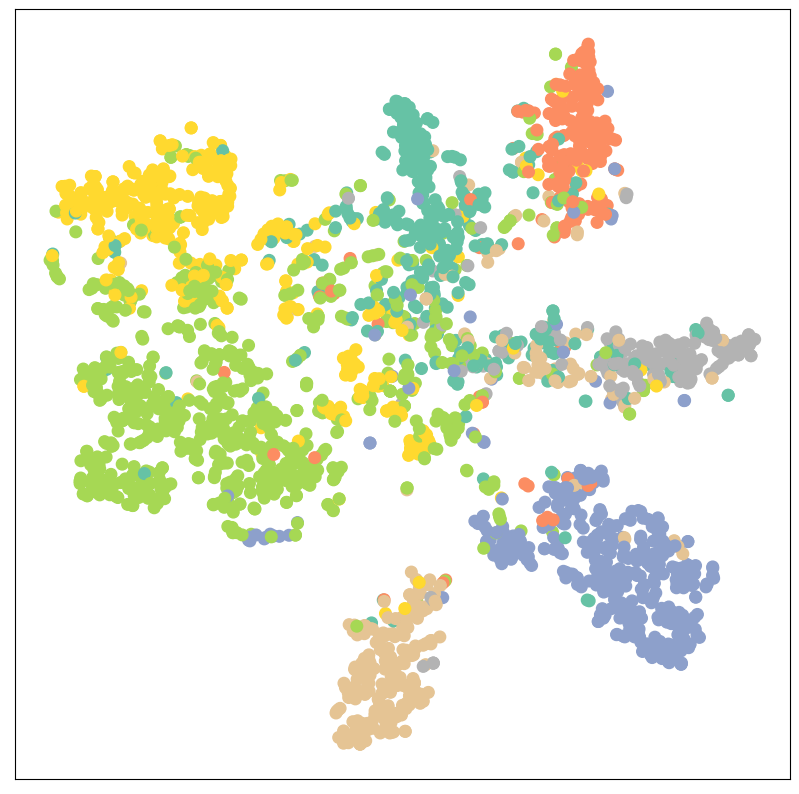

In [147]:
# Evaluate the model on the original graph (containing all nodes/edges) and show its embedding using t-SNE.
# Verify by looking at the output embeddings of the trained model. It should produce a far better clustering of nodes of the same category.

model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)


**Question** Comment the results. 

**Commentaires** On constate que la classification a bien eu lieu car on distingue facilement les clusters, bien que certains points ne soient pas dans le bon cluster (cela est dû au fait qu'on ait un taux d'accuracy de 81,5% et non 100%).

## Conclusion

In this notebook, you have seen how to apply GNNs to real-world problems, and, in particular, how they can effectively be used for boosting a model's performance.
In the next section, we will look into how GNNs can be used for the task of graph classification.

[Next: Graph Classification with Graph Neural Networks](https://colab.research.google.com/drive/1WZnUL_tzGk6VKCYLuOSzNddXZCvYPj6Z#scrollTo=zn5U4EE6K86v)

## (Optional) Exercises

1. To achieve better model performance and to avoid overfitting, it is usually a good idea to select the best model based on an additional validation set.
The `Cora` dataset provides a validation node set as `data.val_mask`, but we haven't used it yet.
Can you modify the code to select and test the model with the highest validation performance?
This should bring test performance to **82% accuracy**.

2. How does `GCN` behave when increasing the hidden feature dimensionality or the number of layers?
Does increasing the number of layers help at all?